# Problem Statement

We are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City. The real estate company has already concluded that two-bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in. 
The real estate company has engaged our firm to build out a data product and provide our conclusions to help them understand which zip codes would generate the most profit on short term rentals within New York City.

# Assumptions


● The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).

● The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).

● All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.). But since Square Foot data is not available, we are assuming the square feet area to be similar across all property types.

● While calculating ROI, we have assumed that there will no increase in property cost once invested in 2019. And we won't be considering the interest accumulation we lost on the cash amount (had the cash been kept in the bank account).

● Median values of revenues and property prices are considered to avoid the effect of the outliers in the analysis.

● Any operating costs like maintenance etc. are assumed to be recovered from the customer though service fee tax etc. So all the revenues are profits and are directly used in ROI calculation.

● Properties with high ROI (in years) and low Years to Breakeven period are considered as more favorable.


# Package Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import mglearn

# Data Loading

Revenue (Airbnb), Cost (Zillow) and Config File Datasets are loaded into Jupyter Notebook for data analysis.


In [3]:
listings_df = pd.read_csv('/Users/sagarsahoo/Desktop/Junk/CapitalOne/listings.csv')
zillow_df = pd.read_csv('/Users/sagarsahoo/Desktop/Junk/CapitalOne/Zip_Zhvi_2bedroom.csv')
config_df = pd.read_csv('/Users/sagarsahoo/Desktop/Junk/CapitalOne/config.csv')

# Data Description

Airbnb dataset:

It contains 106 variables providing property-related information within New York City. Here, we need to only look for 2 Bedroom properties in NYC.

Zillow Dataset:

It contains monthly information on the property price (cost) for the past 20 years. Some of the important Variables and their description: 

RegionName - Zipcode where the property is located.  And 1996-04:2017-06 - Price of each property updated monthly from 1996-04 to 2017-06.

In [4]:
print("The Shape of Airbnb Dataset  is: ", listings_df.shape)
print("The Shape of Zillow Bedroom Dataset is: ", zillow_df.shape)
print("The Shape of Configuration File is: ", config_df.shape)

The Shape of Airbnb Dataset  is:  (48895, 106)
The Shape of Zillow Bedroom Dataset is:  (8946, 262)
The Shape of Configuration File is:  (1, 5)


In [5]:
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38


In [6]:
zillow_df.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100


In [7]:
config_df.head()

,City,Price,Bedrooms,Cleaning_fee_factor,Extra_guests_factor
0,New York,1500,2,0.3,0.3



The Variables "Number of Bedrooms", "Price Per Night", "Zillow City", "Cleaning Fees Factor" and "Extra Guests Factor" has been kept configurable. As per the problem statement, we have kept "Number of Bedrooms" as 2, "Price Per Night" less than 1500 and "Zillow City" as New York. By default, we have assumed Cleaning fees is calculated not on all days rather 30%. And similary we have factored in Extra Guests Fees.

In [8]:
n_bedrooms = config_df['Bedrooms'].iloc[0]
n_max_price = config_df['Price'].iloc[0]
n_zillow_city = config_df['City'].iloc[0]
n_cleaningfee_factor = config_df['Cleaning_fee_factor'].iloc[0]
n_extraguests_factor = config_df['Extra_guests_factor'].iloc[0]

print("Entered Number of Bedrooms for Airbnb Listings is ",n_bedrooms)
print("Entered Max Price Per Night for Airbnb Listings is ",n_max_price)
print("Entered City for Zillow Pricing is ",n_zillow_city)
print("Entered Cleaning Fees Factor is ",n_cleaningfee_factor)
print("Entered Extra Guest Fees Factor is ",n_extraguests_factor)

Entered Number of Bedrooms for Airbnb Listings is  2
Entered Max Price Per Night for Airbnb Listings is  1500
Entered City for Zillow Pricing is  New York
Entered Cleaning Fees Factor is  0.3
Entered Extra Guest Fees Factor is  0.3


# Data Quality Check


Cost and Revenue datasets are handled separately in an attempt to enrich the data quality for exploratory data analysis.

How is it Achieved?

1. We first filter Airbnb listings on 2 Bedrooms as it has already been conveyed that a 2 bedroom apartment would be the most profitable investment among other room types.

2. We dropped irrelevant columns from our analysis to reduce complications

3. The Columns Price, Extra People, Cleaning Fee, Zipcode were cleaned. The missing zip codes values were dropped and the missing Cleaning Fees were imputed with Median values. The price per night has been restricted to 1500 to remove outliers from the analysis. The missing values were checked and as well the summary statistics of the columns.

In [9]:
#Applying Constraints on Data from Config File
listings_df = listings_df[listings_df['bedrooms'] == n_bedrooms ]
zillow_df = zillow_df[zillow_df['City']== n_zillow_city]


#Dropping Columns Not Relevant to Analysis
listings_df.drop(list(listings_df.filter(regex = 'url')), axis = 1, inplace = True)
listings_df.drop(['scrape_id', 'last_scraped',
 'summary', 'space','description', 'experiences_offered', 'neighborhood_overview',
 'notes', 'transit', 'access', 'interaction', 'house_rules','host_name','host_about','host_response_time',
'host_acceptance_rate','host_verifications','host_has_profile_pic','host_identity_verified',
'amenities','calendar_updated',
'calendar_last_scraped','first_review','last_review','license','jurisdiction_names','cancellation_policy',
'require_guest_profile_picture','require_guest_phone_verification','review_scores_rating',
 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value','minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
'number_of_reviews_ltm', 'requires_license', 'instant_bookable', 'is_business_travel_ready','host_response_rate', 'host_is_superhost', 'security_deposit', 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','square_feet','weekly_price',
 'monthly_price', 'country_code', 'country','host_listings_count', 'host_location','market', 'smart_location','is_location_exact','minimum_nights','maximum_nights',
'street','weekly_price','monthly_price','availability_30','availability_60','availability_90'
                ,'beds','city' ,'host_neighbourhood','host_total_listings_count','bathrooms','state','host_since','reviews_per_month'], 
axis = 1, inplace = True)

#Checking for Duplicates in Airbnb and Zillow Datasets
print(listings_df.duplicated(subset=None, keep='first').count())
print(zillow_df.duplicated(subset=None, keep='first').count())


#Cleaning of Columns - Price, extra_people, cleaning_fee,zipcode

listings_df['price'] = listings_df['price'].str.replace('$','')
listings_df['price'] = listings_df['price'].str.replace(',','')
listings_df['price'] = listings_df['price'].astype(float)
listings_df['extra_people'] = listings_df['extra_people'].str.replace('$','')
listings_df['extra_people'] = listings_df['extra_people'].str.replace(',','')
listings_df['extra_people'] = listings_df['extra_people'].astype(float)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace('$','')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace(',','')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype(float)
listings_df.dropna(subset=['zipcode'],inplace=True)
listings_df['zipcode'] = listings_df['zipcode'].astype(str).str.split('-').str[0]
listings_df['zipcode'] = listings_df['zipcode'].astype(str).str.split('\n').str[0]
listings_df['zipcode'] = listings_df['zipcode'].astype(str).str.split('.').str[0]
listings_df['zipcode'] = listings_df['zipcode'].astype('int')


#Replacing Missing Cleaning Fees with Median Price of Zipcode
listings_df["cleaning_fee"] = listings_df.groupby("zipcode")["cleaning_fee"].transform(lambda x: x.fillna(x.median()))
listings_df["cleaning_fee"].isna().sum()
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype(float)
listings_df['cleaning_fee'].fillna(0, inplace=True)

#Replacing Incorrectly mapped Zipcodes of 10013 and Brooklyn with Manhattan
listings_df[listings_df['zipcode']== 10013]['neighbourhood_group_cleansed'] = 'Manhattan'


#Removing Outliers in Airbnb Daily Price (configurable from config file)
listings_df = listings_df[listings_df.price < n_max_price]

#Creating Data of Zipcode and Price from 2013 to 2017
zillow_pricing_df = pd.concat((zillow_df.iloc[:,1],
                               zillow_df.iloc[:,zillow_df.columns.get_loc('2013-01'):]),axis = 1)

print("After Data Cleaning, the Shape of Airbnb Dataset  is: ", listings_df.shape)
print("After Data Cleaning, the Shape of Zillow Bedroom Dataset is: ", zillow_df.shape)

6497
25
After Data Cleaning, the Shape of Airbnb Dataset  is:  (6411, 22)
After Data Cleaning, the Shape of Zillow Bedroom Dataset is:  (25, 262)


To ensure missing values have been taken care of, we re-check once. The columns relevant to analysis do not contain missing values that could hamper our analysis.

In [10]:
#Checing for Null Values in listings_df (Airbnb Data)
missing_listings_df = listings_df.isnull().sum().reset_index()
missing_listings_df[missing_listings_df[0]>0]

,index,0


In [11]:
#Checing for Null Values in zillow_pricing_df (Zillow Data)

missing_zillow_df = zillow_pricing_df.isnull().sum().reset_index()
missing_zillow_df[missing_zillow_df[0]>0]

,index,0


We check the summary statistics of the columns of the cleaned dataframes.

In [12]:
listings_df.describe()

,id,host_id,zipcode,latitude,longitude,accommodates,bedrooms,price,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,calculated_host_listings_count
count,6.411000e+03,6.411000e+03,6411.000000,6411.000000,6411.000000,6411.000000,6411.0,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,1.913572e+07,6.806718e+07,10684.750741,40.723995,-73.956582,4.554672,2.0,217.211200,94.046951,2.151770,17.369209,123.364374,24.687880,6.613789
std,1.142830e+07,8.225625e+07,601.459841,0.052148,0.044179,1.491818,0.0,138.354342,51.818012,1.443222,26.130708,129.162947,43.859018,30.269321
min,7.750000e+03,2.438000e+03,10001.000000,40.508730,-74.239140,1.000000,2.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.930040e+06,6.101278e+06,10023.000000,40.686335,-73.985220,4.000000,2.0,129.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.995475e+07,2.602317e+07,11201.000000,40.719520,-73.959370,4.000000,2.0,185.000000,95.000000,1.000000,5.000000,76.000000,6.000000,1.000000
75%,2.996372e+07,1.097227e+08,11221.000000,40.759495,-73.941250,6.000000,2.0,260.000000,119.000000,4.000000,25.000000,246.000000,27.000000,2.000000
max,3.647731e+07,2.736192e+08,11694.000000,40.905270,-73.716900,16.000000,2.0,1494.000000,621.000000,11.000000,300.000000,365.000000,403.000000,327.000000


In [13]:
zillow_pricing_df.describe()

,RegionName,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,10412.680000,8.901960e+05,8.974160e+05,9.026480e+05,9.092640e+05,9.182200e+05,9.285520e+05,9.407960e+05,9.536240e+05,9.674880e+05,...,1.203912e+06,1.201388e+06,1.201064e+06,1.202428e+06,1.200756e+06,1.203356e+06,1.216940e+06,1.241344e+06,1.268768e+06,1.289684e+06
std,500.615348,6.434992e+05,6.474920e+05,6.498653e+05,6.551000e+05,6.635126e+05,6.715641e+05,6.813480e+05,6.927458e+05,7.057613e+05,...,8.564769e+05,8.468969e+05,8.387594e+05,8.353629e+05,8.299341e+05,8.237741e+05,8.281351e+05,8.452168e+05,8.665523e+05,8.825707e+05
min,10003.000000,2.299000e+05,2.298000e+05,2.304000e+05,2.295000e+05,2.296000e+05,2.313000e+05,2.327000e+05,2.333000e+05,2.344000e+05,...,2.845000e+05,2.871000e+05,2.907000e+05,2.947000e+05,2.990000e+05,3.038000e+05,3.083000e+05,3.138000e+05,3.213000e+05,3.277000e+05
25%,10023.000000,3.016000e+05,3.014000e+05,3.014000e+05,3.015000e+05,3.009000e+05,3.014000e+05,3.021000e+05,3.026000e+05,3.025000e+05,...,3.483000e+05,3.511000e+05,3.561000e+05,3.584000e+05,3.605000e+05,3.649000e+05,3.711000e+05,3.772000e+05,3.837000e+05,3.905000e+05
50%,10304.000000,7.321000e+05,7.394000e+05,7.476000e+05,7.505000e+05,7.527000e+05,7.601000e+05,7.737000e+05,7.907000e+05,8.089000e+05,...,1.207600e+06,1.209800e+06,1.216200e+06,1.221400e+06,1.225600e+06,1.225000e+06,1.219600e+06,1.238100e+06,1.276400e+06,1.302300e+06
75%,10314.000000,1.368700e+06,1.383700e+06,1.396000e+06,1.422200e+06,1.425900e+06,1.426600e+06,1.425100e+06,1.432900e+06,1.441000e+06,...,1.773200e+06,1.760600e+06,1.762000e+06,1.776800e+06,1.775200e+06,1.774500e+06,1.812700e+06,1.914600e+06,1.997800e+06,2.031600e+06
max,11434.000000,2.686200e+06,2.687700e+06,2.694200e+06,2.708600e+06,2.722800e+06,2.727900e+06,2.751300e+06,2.794600e+06,2.845700e+06,...,3.347100e+06,3.305500e+06,3.261100e+06,3.244000e+06,3.231400e+06,3.183300e+06,3.160200e+06,3.193500e+06,3.262200e+06,3.316500e+06


# Exploratory Data Analysis

Since Price is one of the key driving factors in our analysis, we first check for the distribution of price per night in Airbnb listings. The Distribution showed high skewness, so we restrict the listings price to $1500/night (Configurable).

Text(0.5, 1.0, 'Price Distribution Plot')

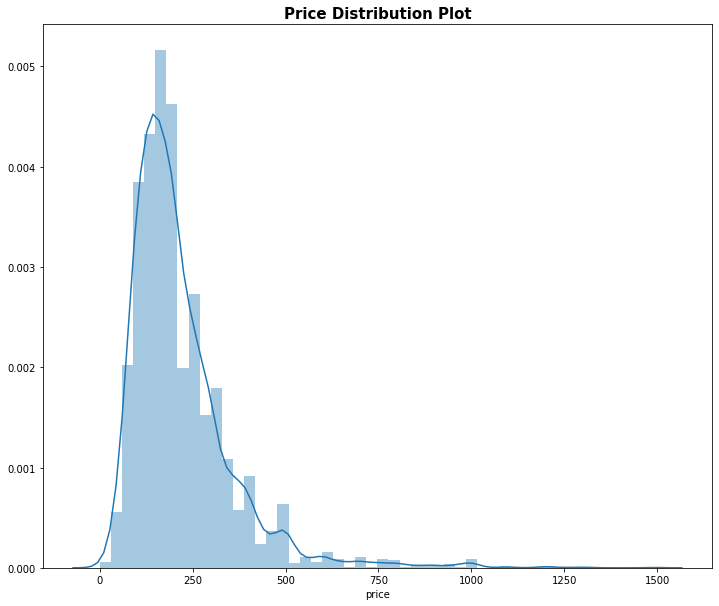

In [14]:
plt.figure(figsize=(12,10))
sns.distplot(listings_df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

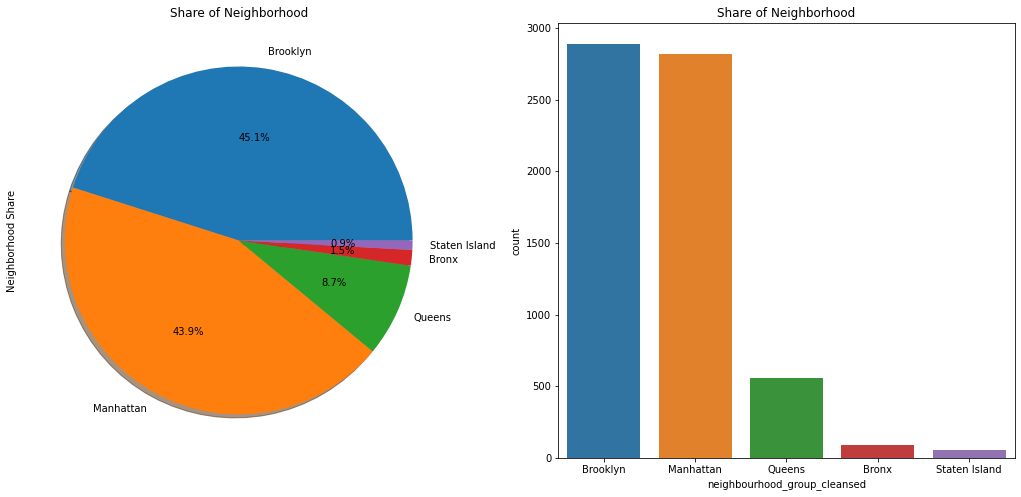

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
listings_df['neighbourhood_group_cleansed'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group_cleansed',data=listings_df,ax=ax[1],
              order=listings_df['neighbourhood_group_cleansed'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

From the above chart, we could see clearly that Manhattan and Brooklyn have the highest number of properties listed in Airbnb.

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group_cleansed')

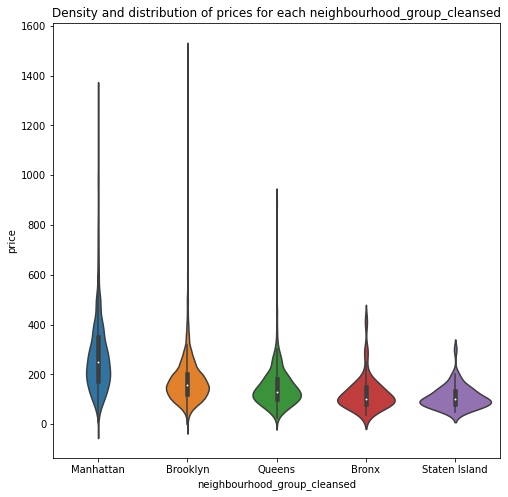

In [16]:
#using violinplot to showcase density and distribtuion of prices
plt.figure(figsize=(8,8))
viz_2=sns.violinplot(data=listings_df, x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group_cleansed')

This violin plot shows the relationship of neighborhood groups to the price per night. The shape of the distribution (wide in the middle for Staten Island, Queens, and Brooklyn) indicates the price is highly concentrated around the median.

[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Staten Island')]

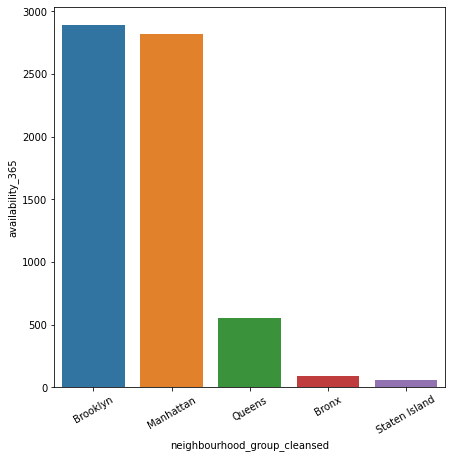

In [17]:
plt.figure(figsize=(7,7))
neighbourhood_group_cleansed_df = listings_df.groupby('neighbourhood_group_cleansed').count()[['availability_365']].sort_values(by='availability_365',ascending=False).head(5)
bar =  sns.barplot(x=neighbourhood_group_cleansed_df.index, y=neighbourhood_group_cleansed_df.availability_365)
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)

Clearly, Brooklyn and Manhattan have the highest availability for the year. In case we consider these neighborhoods we could face stiff competition from competitors. 

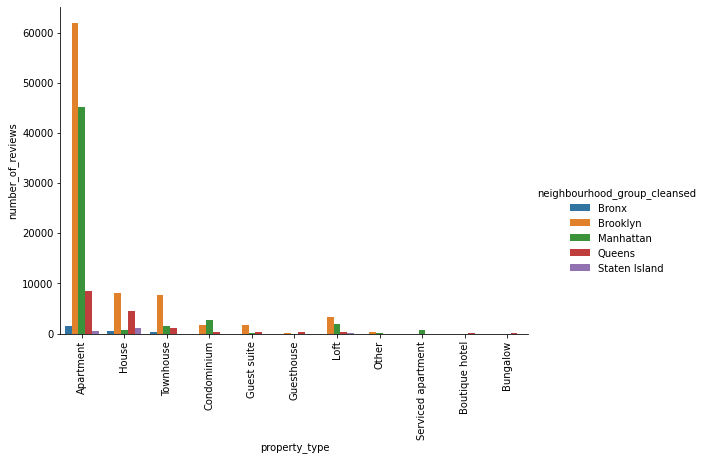

In [18]:
number_of_reviews_df = listings_df.groupby(['neighbourhood_group_cleansed','property_type']).agg({'number_of_reviews':'sum'}).reset_index()
number_of_reviews_df = number_of_reviews_df[number_of_reviews_df['number_of_reviews']>100]
ax = sns.catplot(x="property_type", y="number_of_reviews", hue="neighbourhood_group_cleansed", kind="bar", 
                 data=number_of_reviews_df,height=5.27, aspect=10.7/7.27);
ax.set_xticklabels(rotation=90)

From the customer reviews (in spite of the number of listings being higher in both the neighborhoods), we could see that in Brooklyn and Manhattan (the popular neighborhoods), 2 BR Apartment and House are the most reviewed and popular. Queens and Staten Island as well show closely similar trends.

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.stripplot(x="zipcode", y="price", jitter = True, hue = 'neighbourhood_group_cleansed', data=listings_df)
ax.set_xticklabels([])
ax.set_ylabel('Price / Night', fontsize = 10)

The above chart shows that the majority of Airbnb listings are priced less than 500$ per night.

Queens and Staten Island have fewer listings as compared to Brooklyn/Manhattan and the price/night is less than 200$ per night. To avoid complications in the chart, the zip codes are not showed up. The hue can be used as a reference for considering neighborhoods.

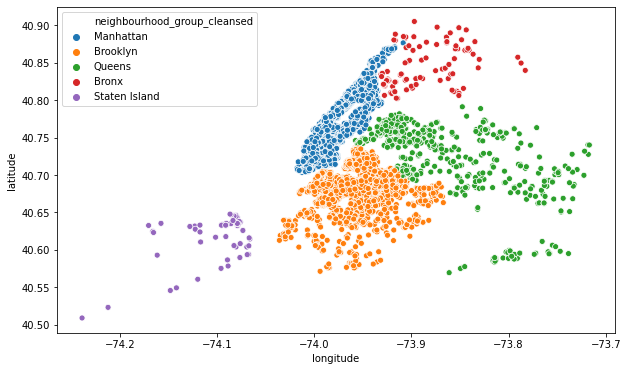

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings_df.longitude,listings_df.latitude,hue=listings_df.neighbourhood_group_cleansed)
plt.ioff()

In [29]:
n

['Allerton',
 'Arrochar',
 'Arverne',
 'Astoria',
 'Bath Beach',
 'Battery Park City',
 'Bay Ridge',
 'Baychester',
 'Bayside',
 'Bayswater',
 'Bedford-Stuyvesant',
 'Belle Harbor',
 'Bellerose',
 'Belmont',
 'Bensonhurst',
 'Bergen Beach',
 'Boerum Hill',
 'Borough Park',
 'Briarwood',
 'Brighton Beach',
 'Brooklyn Heights',
 'Brownsville',
 'Bushwick',
 'Cambria Heights',
 'Canarsie']

The above representation of listings is generated using Latitude and Longitude. It helps us visualize the density of the listings in the context of the neighborhoods.

Text(0, 0.5, 'Average Price')

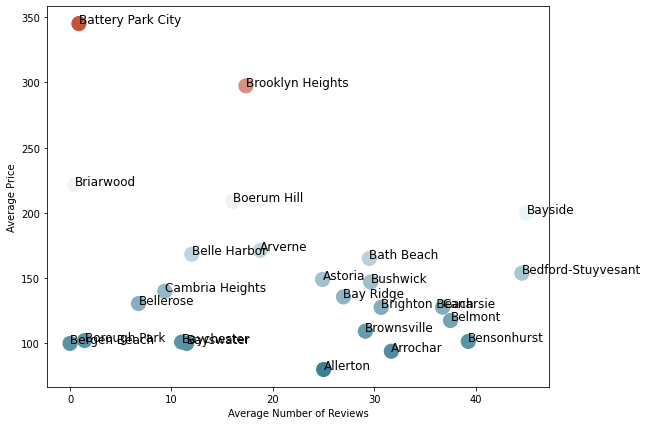

In [35]:
top_k=25
x = listings_df.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_index()[:top_k]
y = listings_df.groupby('neighbourhood_cleansed')['price'].mean().sort_index()[:top_k]
n = (x.reset_index()).neighbourhood_cleansed.tolist()[:top_k]
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(x, y, c=y, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), s=200)
for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

plt.xlabel('Average Number of Reviews')
plt.ylabel('Average Price')


The above visualization helps us understand the variation of Average Price and Average Number of Reviews for all the neighborhoods.

In [21]:
zillow_pricing_df.head(5)

,RegionName,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,1091600.0,1106100.0,1121700.0,1139900.0,1153100.0,1174400.0,1182500.0,1170800,1166000,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,10011,1684600.0,1703000.0,1710000.0,1734300.0,1765200.0,1786000.0,1810700.0,1841500,1867600,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,10003,1435300.0,1460300.0,1466500.0,1458100.0,1465500.0,1502300.0,1563900.0,1592000,1596200,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000



Defining Revenue, property cost and years to breakeven:

Airbnb Revenue:


We now calculate the approximate revenue that is currently being earned by the hosts through their listed Airbnb properties. Assuming 75% Occupancy Rate throughout the Year, we have  

Revenue per Year = [Price/Night + Cleaning Factor * Cleaning Fees + Extra People Factor * ( Extra People * Guests Included)] * 75% * 365

Zillow Property Evaluation:

Expected Property cost - The latest Property cost provided in the problem statement was of Jun’17. To bring the property cost inline with Airbnb Listings price, we calculated the average growth rate for the past 3 Years (2014-15, 2015-16 and 2016-17) and extrapolated the price based on the growth rate to predict property cost as of June 2019. 

Then we calculate,

Years to Breakeven = Property cost/Revenue per Year

ROI% = 100 * Revenue per Year / Property cost


In [22]:
#Calculating Revenue Per Year for each Airbnb Listing

listings_df.loc[:,'Revenue per Year'] = (listings_df.loc[:,'price']+
                                                        n_cleaningfee_factor * (listings_df.loc[:,'cleaning_fee'])
                                                       + 
                    (listings_df.loc[:,'extra_people']*listings_df.loc[:,'guests_included'])*n_extraguests_factor
                                                       )*0.75 * 365


#Calculating Annual Growth Rate for 2014-15, 2015-16 and 2016-17 and storing in dataframe
zillow_pricing_df['Growth_16_17'] = (zillow_pricing_df['2017-06'] - 
                           zillow_pricing_df['2016-06'] ) / zillow_pricing_df['2016-06']

zillow_pricing_df['Growth_15_16'] = (zillow_pricing_df['2016-06'] - 
                           zillow_pricing_df['2015-06'] ) / zillow_pricing_df['2015-06']

zillow_pricing_df['Growth_14_15'] = (zillow_pricing_df['2015-06'] - 
                           zillow_pricing_df['2014-06'] ) / zillow_pricing_df['2014-06']

#Calculating Average Annual Growth Rate 
zillow_pricing_df['Avg Growth'] = round((zillow_pricing_df['Growth_16_17'] + 
                                    zillow_pricing_df['Growth_15_16']  +
                                    zillow_pricing_df['Growth_14_15']) / 3,2)


#Calculating Property Cost for June 2019 using June 2017 Cost and Average Annual Growth Rate
zillow_pricing_df['Expected Property Cost'] = zillow_pricing_df['2017-06'] * pow((1 + zillow_pricing_df['Avg Growth']),2)
zillow_pricing_df['Avg Growth'] = zillow_pricing_df['Avg Growth'].astype(float)

#Merging Zillow and Airbnb Data on the basis of Zipcodes
listings_merged_df = pd.merge(listings_df, 
                       zillow_pricing_df[['RegionName','Expected Property Cost']], 
                       left_on='zipcode', right_on='RegionName')

#Calculating Years to Breakeven and ROI%
listings_merged_df['Years to Breakeven'] = listings_merged_df['Expected Property Cost'] / listings_merged_df['Revenue per Year']
listings_merged_df['ROI%'] = 100*listings_merged_df['Revenue per Year'] / listings_merged_df['Expected Property Cost']  


listings_merged_df.drop(['RegionName'], axis = 1, inplace = True)

Now that we have calculated the ROI% at Listings level, we need to find the Breakeven Years and ROI% at Zipcode Level. We fetched the median values at the Zipcode level as the median is more robust to outliers as compared to mean.

In [23]:
profit_table = listings_merged_df.groupby(["zipcode"]).agg({'Years to Breakeven' : 'median', 'Expected Property Cost' : 'median',
                                    'Years to Breakeven': 'median',
                                   'id':'count',
                                     'ROI%':'median'}).reset_index()

profit_table = pd.merge(profit_table, 
                       listings_merged_df[['zipcode','neighbourhood_group_cleansed']], 
                       left_on='zipcode', right_on='zipcode',how='left').drop_duplicates(keep='last').reset_index()

profit_table.drop(['id','index'], axis = 1, inplace = True)
profit_table = profit_table.sort_values(['Years to Breakeven']).reset_index(drop=True)

In [24]:
profit_table

,zipcode,Years to Breakeven,Expected Property Cost,ROI%,neighbourhood_group_cleansed
0,10306,9.647002,411622.56,10.457927,Staten Island
1,11234,10.609345,535844.84,9.425653,Brooklyn
2,11434,11.009031,471031.83,9.138913,Queens
3,10304,11.027014,404498.43,9.068638,Staten Island
4,10303,11.901477,403759.17,8.407239,Staten Island
5,10309,12.279561,447083.45,8.143614,Staten Island
6,10305,13.317191,523765.71,7.551092,Staten Island
7,10308,13.403223,486526.95,7.595931,Staten Island
8,10314,14.978314,416754.72,7.110522,Staten Island
9,10036,17.500877,1747329.29,5.714453,Manhattan


Text(0.5, 1.05, 'Years to Breakeven across Zipcodes')

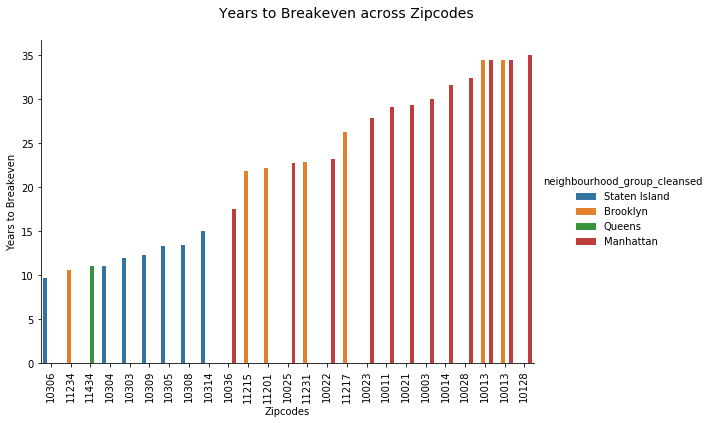

In [25]:
ax = sns.catplot(x="zipcode", y="Years to Breakeven", hue="neighbourhood_group_cleansed", kind="bar", 
                 data=profit_table,height=5.27, aspect=10.7/7.27,order=profit_table['zipcode']);
ax.set_xticklabels(rotation=90)
ax.set_xlabels('Zipcodes', fontsize = 10)
ax.set_ylabels('Years to Breakeven', fontsize = 10)
plt.suptitle('Years to Breakeven across Zipcodes', y=1.05, fontsize=14, ha = 'center')

The plot of Years to Breakdown against Zipcodes helps us visually get an idea of the Breakeven across the zipcodes for the Neighbourhoods.

Text(0, 0.5, 'ROI%')

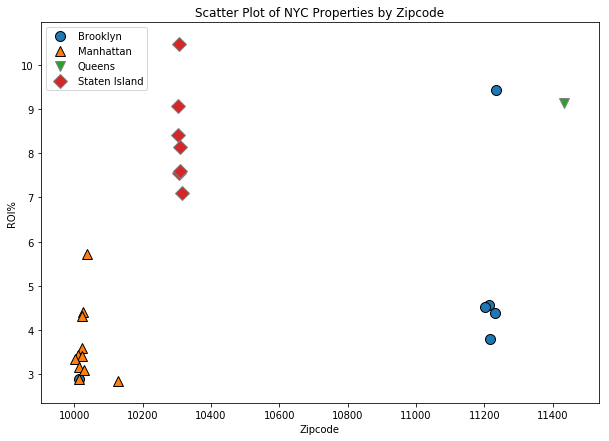

In [26]:
plt.figure(figsize=(10, 7))
mglearn.discrete_scatter((profit_table['zipcode']),profit_table['ROI%'],profit_table['neighbourhood_group_cleansed'],
                         ax=None)
plt.title("Scatter Plot of NYC Properties by Zipcode")
plt.legend(np.sort(profit_table['neighbourhood_group_cleansed'].unique()))
plt.xlabel("Zipcode")
plt.ylabel("ROI%")

The above figure shows that the ROI for Manhattan/Brooklyn Neighbourhoods is less as compared to Queens and Staten Island. Only Zipcode 112234 of Brooklyn shows higher ROI% as compared to other zipcodes of Brooklyn.

In [27]:
# Neighboirhoods/Zipcodes with Top 5 Years to Breakeven Index 
profit_table.sort_values(by='Years to Breakeven',ascending=True).head(5)

,zipcode,Years to Breakeven,Expected Property Cost,ROI%,neighbourhood_group_cleansed
0,10306,9.647002,411622.56,10.457927,Staten Island
1,11234,10.609345,535844.84,9.425653,Brooklyn
2,11434,11.009031,471031.83,9.138913,Queens
3,10304,11.027014,404498.43,9.068638,Staten Island
4,10303,11.901477,403759.17,8.407239,Staten Island


In [28]:
# Neighboirhoods/Zipcodes with Least 5 ROI% Index 
profit_table.sort_values(by='ROI%').head(5)

,zipcode,Years to Breakeven,Expected Property Cost,ROI%,neighbourhood_group_cleansed
24,10128,34.974872,2322515.16,2.859475,Manhattan
22,10013,34.419448,3518474.85,2.905964,Brooklyn
23,10013,34.419448,3518474.85,2.905964,Manhattan
21,10028,32.319398,2521519.00,3.094117,Manhattan
20,10014,31.515359,2799561.76,3.173064,Manhattan


# Conclusion

Manhattan has got the most expensive properties (both w.r.t price ) and because of that, it would take a lot of years to breakeven and as well the ROI% is less.

The Years to Breakeven in Staten Island is the least, hence it would be better if we invest in Staten Island.

I would finally suggest Zipcodes 10306, 11234, 11434,10304, 10303  wherein the ROI is highest (Assuming 30% Cleaning Fees Factor and 30% Extra Guests Factor).

During exploratory data analysis, we found that 2 Bedroom Apartment and House are the most reviewed property types. And the average number of reviews is more for listings with a price less than 200-300 per night. We need to keep these insights in mind while investing in properties.

Here the parameters City, Number of Bedrooms, Price Per Night, Cleaning Fees Factor, Extra Guests Factor are kept configurable and thus scalable. These functions can be used for future purposes when the client is trying to enter new market or reconfigure revenue parameters or property types.

# Suggestions for the Future


We can have data from multiple relevant and trustworthy sources apart from Zillow and Airbnb to improve our recommendation further. We can get the yearly data that is made publicly available by Airbnb to identify trends. We can create word cloud for each neighborhood to identify sentiments of the guests for any particluar neighborhood. We can extend this even to other parts of USA and not just restrict ourseleves to New York City.

If the data for different variable expenses such as maintenance, repair, taxes were available, it would have helped to use them in the result.

We could keep in mind  Economic, Technological and Legal factors that might affect the revenue in the future.

We can consider annual property growth after investment, cash interest accumulation lost post-investment while evaluating properties and doing a break-even analysis.